<a href="https://colab.research.google.com/github/JeffAkkerman/DataScience/blob/main/Day_100_Determinants_of_Earnings_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [115]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###  Import Statements


In [116]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [117]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [118]:
df_data = pd.read_csv('NLSY97_subset.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

In [119]:
df_data_descriptions = pd.read_csv('NLSY97_Variable_Names_and_Descriptions.csv')
df_data_descriptions = df_data_descriptions.drop_duplicates()
df_data_descriptions.shape

(108, 3)

In [120]:
df_data_descriptions.drop(2, inplace=True)
df_data_descriptions.index = range(0,len(df_data_descriptions))
df_data_descriptions.shape

<ipython-input-120-2417511bae99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_descriptions.drop(2, inplace=True)


(107, 3)

In [121]:
# Gender
df_data_descriptions.iloc[0:2]

,Personal variables,Variable Type,Description
0,FEMALE,D,"Sex of respondent (0 if male, 1 if female)"
1,MALE,D,"Sex of respondent (1 if male, 0 if female)"


In [122]:
# Ethnicity
df_data_descriptions.iloc[2:6]

,Personal variables,Variable Type,Description
2,Ethnicity:,NaN,NaN
3,ETHBLACK,D,Black
4,ETHHISP,D,Hispanic
5,ETHWHITE,D,"Non-black, non-hispanic"


In [123]:
# Demographics: Age, Birthyear, Height, Weight 
df_data_descriptions.iloc[6:11]

,Personal variables,Variable Type,Description
6,AGE,C,Age in 2011
7,BYEAR,C,Year of birth
8,HEIGHT,C,"Height, in inches, in 2004"
9,WEIGHT04,C,"Weight, in pounds, in 2004"
10,WEIGHT11,C,"Weight, in pounds, in 2011"


In [124]:
# Education
df_data_descriptions.iloc[11:21]

,Personal variables,Variable Type,Description
11,S,C,Years of schooling (highest grade completed as...
12,Highest educational qualification:,NaN,NaN
13,EDUCPROF,D,Professional degree
14,EDUCPHD,D,Doctorate
15,EDUCMAST,D,Master's degree
16,EDUCBA,D,Bachelor's degree
17,EDUCAA,D,Associate's (two-year college) degree
18,EDUCHSD,D,High school diploma
19,EDUCGED,D,General Educational Development certificate (H...
20,EDUCDO,D,High school drop-out


In [125]:
# Marital Status
df_data_descriptions.iloc[21:26]

,Personal variables,Variable Type,Description
21,Marital status,NaN,NaN
22,SINGLE,D,"Single, never married"
23,MARRIED,D,"Married, spouse present"
24,COHABIT,D,Cohabiting
25,OTHSING,D,Other single


In [126]:
# Scaled score on a component of the ASVAB
df_data_descriptions.iloc[26:36]

,Personal variables,Variable Type,Description
26,Scaled score on a component of the ASVAB battery,NaN,NaN
27,ASVABAR,C,Arithmetic reasoning
28,ASVABWK,C,Word knowledge
29,ASVABPC,C,Paragraph comprehension
30,ASVABNO,C,Numerical operations (speed test)
31,ASVABCS,C,Coding speed (speed test)
32,ASVABC,C,"Composite of ASVABAR (with double weight), ASV..."
33,ASVABC4,C,"Composite of ASVABAR, ASVABWK, ASVABPC and mat..."
34,VERBAL,C,Composite of ASVABWK and ASVABPC
35,ASVABMV,C,NLSY constructed math verbal composite


In [127]:
# Faith
df_data_descriptions.iloc[36:43]

,Personal variables,Variable Type,Description
36,Faith:,NaN,NaN
37,FAITHN,D,None
38,FAITHC,D,Catholic
39,FAITHJ,D,Jewish
40,FAITHP,D,Protestant
41,FAITHO,D,Other
42,FAITHM,D,Missing value


In [128]:
# Family Background Variables
df_data_descriptions.iloc[43:50]

,Personal variables,Variable Type,Description
43,Family background variables,NaN,NaN
44,SM,C,Years of schooling of biological mother
45,SF,C,Years of schooling of biological father
46,SMR,C,Years of schooling of residential mother
47,SFR,C,Years of schooling of residential father
48,SIBLINGS,C,Number of siblings
49,AGEMBTH,C,Age of mother at respondent’s birth


In [129]:
# Household Location, 1997
df_data_descriptions.iloc[50:62]

,Personal variables,Variable Type,Description
50,"Household location, 1997",NaN,NaN
51,MSA97NO,D,Not in metropolitan statistical area
52,MSA97NCC,D,"MSA, not central city"
53,MSA97CC,D,"MSA, central city"
54,MSA97NK,D,"MSA, not known"
55,RS97RURL,D,Rural
56,RS97URBN,D,Urban
57,RS97UNKN,D,Rural/urban unknown
58,REG97NE,D,Census region North east
59,REG97NC,D,Census region North central


In [130]:
# Household Structure, in terms of parents, 1997
df_data_descriptions.iloc[62:69]

,Personal variables,Variable Type,Description
62,"Household structure, in terms of parents, 1997:",NaN,NaN
63,HHBMBF,D,Biological mother and father
64,HHBMOF,D,"Biological mother, other father"
65,HHOMBF,D,"Other mother, biological father"
66,HHBMONLY,D,Biological mother only
67,HHBFONLY,D,Biological father only
68,HHOTHER,D,Other


In [131]:
# Household Income
df_data_descriptions.iloc[69:72]

,Personal variables,Variable Type,Description
69,Household income,NaN,NaN
70,HHINC97,C,"Gross household income, $, in year prior to 19..."
71,POVRAT97,C,"Ratio of household income to poverty level, 1997"


In [132]:
# Parental monitoring 1997 (scale of 0, low, to 16, high)	
df_data_descriptions.iloc[72:75]

,Personal variables,Variable Type,Description
72,"Parental monitoring 1997 (scale of 0, low, to ...",NaN,NaN
73,PRMONM,C,Monitoring by mother
74,PRMONF,C,Monitoring by father


In [133]:
# Parental style 1997 (scale of 0, low, to 16, high)	
df_data_descriptions.iloc[75:84]

,Personal variables,Variable Type,Description
75,"Parental style 1997 (scale of 0, low, to 16, h...",NaN,NaN
76,PRMSTYUN,D,"Mother, uninvolved"
77,PRMSTYPE,D,"Mother, permissive"
78,PRMSTYAU,D,"Mother, authoritarian"
79,PRMSTYAE,D,"Mother, authoritative"
80,PRFSTYUN,D,"Father, uninvolved"
81,PRFSTYPE,D,"Father, permissive"
82,PRFSTYAU,D,"Father, authoritarian"
83,PRFSTYAE,D,"Father, authoritative"


In [134]:
df_data_descriptions.loc[75, "Personal variables"]

'Parental style 1997 (scale of 0, low, to 16, high)'

In [135]:
# Work-related variables
df_data_descriptions.iloc[84:91]

,Personal variables,Variable Type,Description
84,Work-related variables,NaN,NaN
85,EARNINGS,C,Current hourly earnings in $ reported at the 2...
86,HOURS,C,"Usual number of hours worked per week, 2011 in..."
87,TENURE,C,Tenure (years) with current employer at the 20...
88,EXP,C,Total out-of-school work experience (years) as...
89,COLLBARG,D,"Pay set by collective bargaining, 2011"
90,JOBS,C,"Number of jobs, as of 2011 interview"


In [136]:
# Category of employment
df_data_descriptions.iloc[91:97]

,Personal variables,Variable Type,Description
91,Category of employment,NaN,NaN
92,CATGOV,D,Government
93,CATPRI,D,Private sector
94,CATSE,D,Self-employment
95,CATNPO,D,Non=profit organization
96,CATMIS,D,Missing value


In [137]:
# Living in 2011 in:
df_data_descriptions.iloc[97:107]

,Personal variables,Variable Type,Description
97,Living in 2011 in:,NaN,NaN
98,MSA11NO,D,Not in metropolitan statistical area
99,MSA11NCC,D,"MSA, not central city"
100,MSA11CC,D,"MSA, central city"
101,MSA11NK,D,"MSA, not known"
102,URBAN,D,Living in an urban area
103,REGNE,D,Census region North east
104,REGNC,D,Census region North central
105,REGW,D,Census region West
106,REGS,D,Census region South


# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [138]:
 print(f"DF has shape: {df_data.shape}" +
       f"\n\nColumn names: {df_data.columns.tolist()}" +
       f"\n\nThere are {len(df_data[df_data.duplicated()])} duplicate rows and {df_data.isna().values.sum()} NaN values\n")

DF has shape: (2000, 96)

Column names: ['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE', 'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF', 'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC', 'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD', 'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO', 'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE', 'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED', 'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO', 'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO', 'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT', 'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE', 'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN', 'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS', 'CATSE', 'COLLBARG', 'URBAN', 'REGNE', 'REGNC', 'REGW', 'REGS', 'MSA11NO', 'MSA11NCC'

In [192]:
df_data.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,453.00","1,205.00",...,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00"
mean,"3,547.13",18.81,14.56,6.70,0.49,0.51,"1,982.07",28.93,26.32,"58,310.67",...,0.78,0.16,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00
std,"2,009.84",12.00,2.77,2.86,0.50,0.50,1.38,1.38,5.08,"43,868.05",...,0.43,0.36,0.44,0.47,0.42,0.21,0.50,0.49,0.04,0.00
min,1.00,2.00,6.00,0.00,0.00,0.00,"1,980.00",27.00,12.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,888.00",11.41,12.00,4.65,0.00,0.00,"1,981.00",28.00,23.00,"32,000.00",...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,474.00",15.75,15.00,6.63,0.00,1.00,"1,982.00",29.00,26.00,"50,500.00",...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5,160.50",22.60,16.00,8.71,1.00,1.00,"1,983.00",30.00,30.00,"72,000.00",...,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
max,"8,980.00",132.89,20.00,14.73,1.00,1.00,"1,984.00",31.00,45.00,"246,474.00",...,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


In [140]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2000 non-null   int64  
 1   EARNINGS  2000 non-null   float64
 2   S         2000 non-null   int64  
 3   EXP       2000 non-null   float64
 4   FEMALE    2000 non-null   int64  
 5   MALE      2000 non-null   int64  
 6   BYEAR     2000 non-null   int64  
 7   AGE       2000 non-null   int64  
 8   AGEMBTH   1956 non-null   float64
 9   HHINC97   1630 non-null   float64
 10  POVRAT97  1627 non-null   float64
 11  HHBMBF    2000 non-null   int64  
 12  HHBMOF    2000 non-null   int64  
 13  HHOMBF    2000 non-null   int64  
 14  HHBMONLY  2000 non-null   int64  
 15  HHBFONLY  2000 non-null   int64  
 16  HHOTHER   2000 non-null   int64  
 17  MSA97NO   2000 non-null   int64  
 18  MSA97NCC  2000 non-null   int64  
 19  MSA97CC   2000 non-null   int64  
 20  MSA97NK   2000 non-null   int6

In [141]:
df_data

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,0,1,1983,28,30.00,NaN,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2456,14.00,8,7.87,1,0,1982,29,19.00,"6,000.00",...,1,1,0,0,0,0,1,0,0,0
1996,1119,14.83,18,1.92,1,0,1983,28,28.00,"50,000.00",...,1,1,0,0,0,0,1,0,0,0
1997,3561,35.88,18,2.67,1,0,1984,27,29.00,"77,610.00",...,1,0,0,1,0,0,0,1,0,0
1998,5980,25.48,16,4.71,1,0,1982,29,23.00,"69,300.00",...,0,0,0,1,0,0,1,0,0,0


## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [142]:
df_data = df_data.drop_duplicates()
print(f"After dropping duplicate rows the DF has shape: {df_data.shape}" +
       f"\n\nColumn names: {df_data.columns.tolist()}" +
       f"\n\nThere are {len(df_data[df_data.duplicated()])} duplicate rows and {df_data.isna().values.sum()} NaN values\n")

After dropping duplicate rows the DF has shape: (1487, 96)

Column names: ['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE', 'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF', 'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC', 'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD', 'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO', 'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE', 'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED', 'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO', 'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO', 'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT', 'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE', 'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN', 'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS', 'CATSE', 'COLLBARG', 'URBAN', 'REGNE', 'REGNC', 'RE

## Descriptive Statistics

* How many males and females are there?
* What is the average hourly earning in the dataset?
* How many births for each distinct birth year? 
* What is `AGEMBTH` and what are the minimum and the maximum values?
* What is `HHINC97`?

In [143]:
print(f"There are {df_data['MALE'].sum()} males and {df_data['FEMALE'].sum()} females")

There are 761 males and 726 females


In [144]:
print(f"The average earnings per hour are: ${round(df_data['EARNINGS'].mean(), 2)}")

The average earnings per hour are: $18.81


In [193]:
df_data[['EARNINGS','ID']].groupby('EARNINGS').count()

,ID
EARNINGS,
2.00,1
2.13,6
2.26,1
2.33,1
2.50,1
...,...
91.67,1
96.15,2
100.00,1


In [145]:
df_data[['BYEAR','ID']].groupby('BYEAR').count()

,ID
BYEAR,
1980,256
1981,304
1982,312
1983,315
1984,300


In [146]:
# AGEMBTH = Age of mother at respondent’s birth
print(f"The max age of a mother at respondents birth: {df_data['AGEMBTH'].max()}" +
      f"\nThe min age of a mother at respondents birth: {df_data['AGEMBTH'].min()}")

The max age of a mother at respondents birth: 45.0
The min age of a mother at respondents birth: 12.0


In [147]:
# What is HHINC97?
df_data_descriptions.loc[70, 'Description']

'Gross household income, $, in year prior to 1997 interview'


---

---

# Visualise the Features

Having looked at some descriptive statistics, we'll visualise the data to see the distributions.

We'll visualise the **quantitative** data using Seaborn's .displot() to create a bar chart and superimpose the Kernel Density Estimate (KDE) for the following **quantitative** variables:

*   Demographics
*   Scaled score on components of the ASVAB
*   Family Background Variables
*   Household Income
*   Parental monitoring 1997 (scale of 0, low, to 16, high)
*   Parental style 1997 (scale of 0, low, to 16, high)
*   Work-related variables


---


---




### Demographics
*   AGE -	Age in 2011
*   BYEAR	-	Year of birth
*   HEIGHT	-	Height, in inches, in 2004
*   WEIGHT04	-	Weight, in pounds, in 2004
*   WEIGHT11	-	Weight, in pounds, in 2011

In [148]:
age_df = pd.DataFrame()
age_df['age'] = df_data['AGE'].value_counts().index
age_df['count'] = df_data['AGE'].value_counts().values
age_df

,age,count
0,28,315
1,29,312
2,30,304
3,27,300
4,31,256


Text(0, 0.5, 'Age (years)')

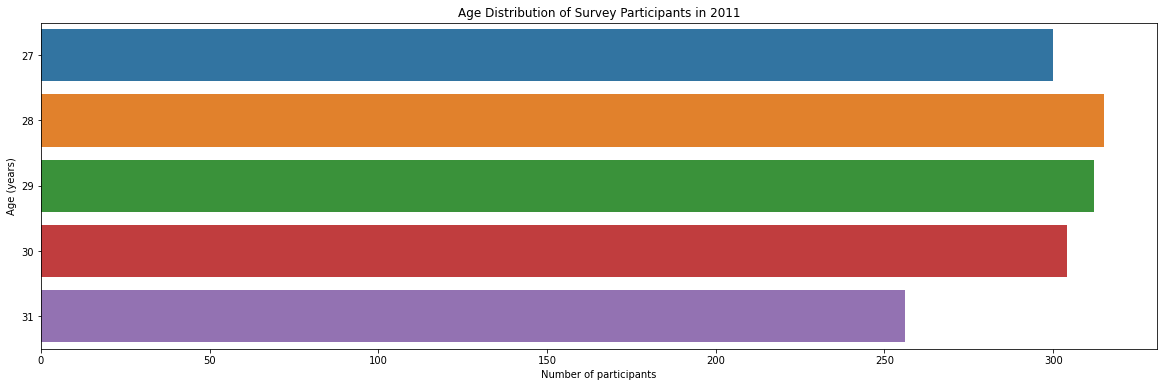

In [149]:
# Set the width and height of the figure
plt.figure(figsize=(20,6))

# Add title
plt.title("Age Distribution of Survey Participants in 2011")

# Bar chart showing age distribution of survey participants in 2011
sns.barplot(
    data=age_df,
    x='count',
    y='age',
    orient='h')

# Add label for horizontal and vertical axis
plt.xlabel("Number of participants")
plt.ylabel("Age (years)")

In [150]:
byear_df = pd.DataFrame()
byear_df['byear'] = df_data['BYEAR'].value_counts().index
byear_df['count'] = df_data['BYEAR'].value_counts().values
byear_df

,byear,count
0,1983,315
1,1982,312
2,1981,304
3,1984,300
4,1980,256


Text(0, 0.5, 'Birth Year')

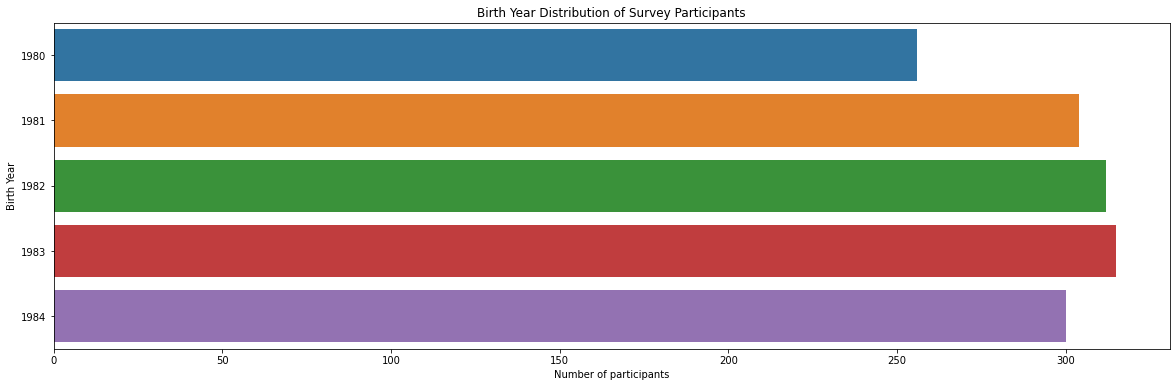

In [151]:
# Set the width and height of the figure
plt.figure(figsize=(20,6))

# Add title
plt.title("Birth Year Distribution of Survey Participants")

# Bar chart showing age distribution of survey participants in 2011
sns.barplot(
    data=byear_df,
    x='count',
    y='byear',
    orient='h')

# Add label for horizontal and vertical axis
plt.xlabel("Number of participants")
plt.ylabel("Birth Year")

# Unsurprisingly, the Birth Year and Age graphs are identical.

In [152]:
height_df = pd.DataFrame()
height_df['height'] = df_data['HEIGHT'].value_counts().index
height_df['count'] = df_data['HEIGHT'].value_counts().values
height_df

,height,count
0,67,143
1,66,130
2,72,126
3,64,120
4,69,111
5,68,111
6,71,104
7,70,99
8,65,92
9,63,91


Text(0, 0.5, 'Number of Participants')

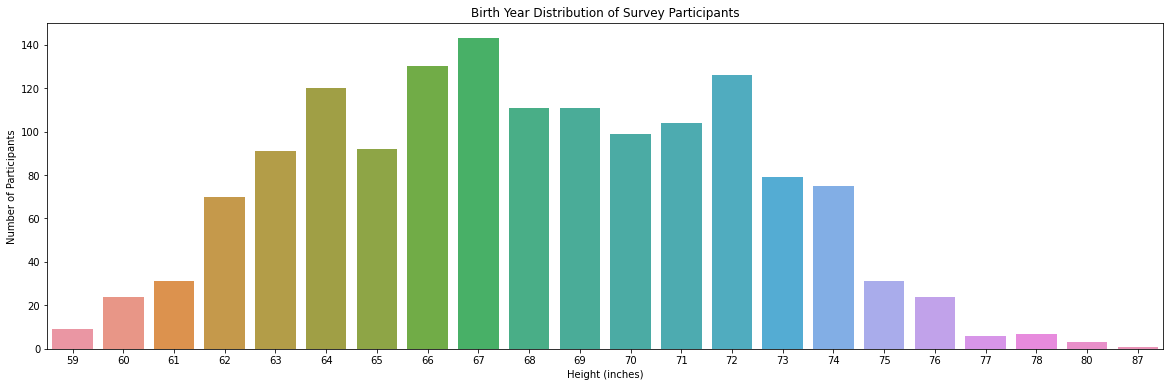

In [153]:
# Set the width and height of the figure
plt.figure(figsize=(20,6))

# Add title
plt.title("Birth Year Distribution of Survey Participants")

# Bar chart showing age distribution of survey participants in 2011
sns.barplot(
    data=height_df,
    x='height',
    y='count',
    # orient='h'
    )

# Add label for horizontal and vertical axis
plt.xlabel("Height (inches)")
plt.ylabel("Number of Participants")

In [154]:
weight04_df = pd.DataFrame()
weight04_df['weight'] = df_data['WEIGHT04'].value_counts().index
weight04_df['count'] = df_data['WEIGHT04'].value_counts().values
weight04_df

,weight,count
0,140,80
1,180,71
2,135,64
3,145,64
4,150,64
...,...,...
149,199,1
150,121,1
151,174,1
152,97,1


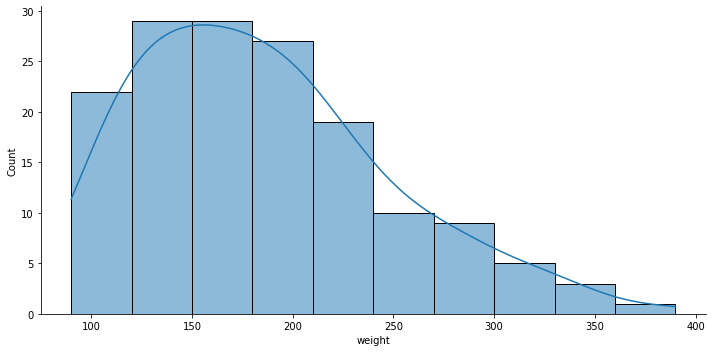

In [155]:
hist = sns.displot(
    data=weight04_df,
    x="weight",
    aspect=2,
    kde=True,
)


In [156]:
weight11_df = pd.DataFrame()
weight11_df['weight'] = df_data['WEIGHT11'].value_counts().index
weight11_df['count'] = df_data['WEIGHT11'].value_counts().values
weight11_df

,weight,count
0,200,62
1,170,62
2,150,62
3,180,60
4,140,58
...,...,...
170,177,1
171,415,1
172,346,1
173,395,1


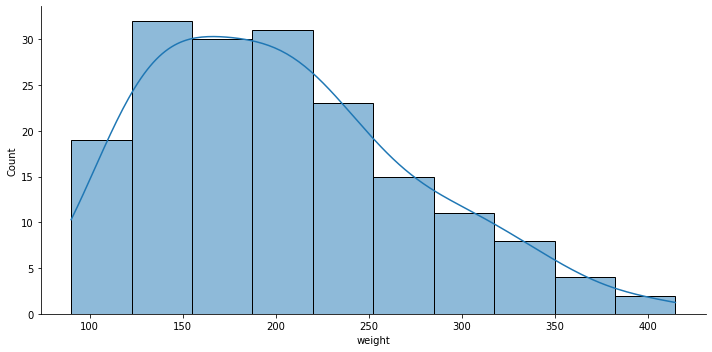

In [157]:
hist = sns.displot(
    data=weight11_df,
    x="weight",
    aspect=2,
    kde=True,
)

### Scaled score on components of the ASVAB
##### Armed Services Vocational Aptitude Battery (ASVAB) - aptitude test that measures deveolped abilities and helps predict future academic and occupational success


*   ASVABAR	- Arithmetic reasoning
*   ASVABWK	-	Word knowledge
*   ASVABPC	-	Paragraph comprehension
*   ASVABNO	-	Numerical operations (speed test)
*   ASVABCS	-	Coding speed (speed test)
*   ASVABC	-	Composite of ASVABAR (with double weight), ASVABWK and ASVABPC
*   ASVABC4	-	Composite of ASVABAR, ASVABWK, ASVABPC and math knowledge score
*   VERBAL	-	Composite of ASVABWK and ASVABPC
*   ASVABMV	-	NLSY constructed math verbal composite




In [158]:
arithmetic_df = pd.DataFrame()
arithmetic_df['score'] = df_data['ASVABAR'].value_counts().index
arithmetic_df['count'] = df_data['ASVABAR'].value_counts().values
arithmetic_df

,score,count
0,0.47,3
1,0.37,3
2,0.59,3
3,0.24,3
4,-0.20,2
...,...,...
1410,-0.77,1
1411,0.03,1
1412,-0.11,1
1413,-0.19,1


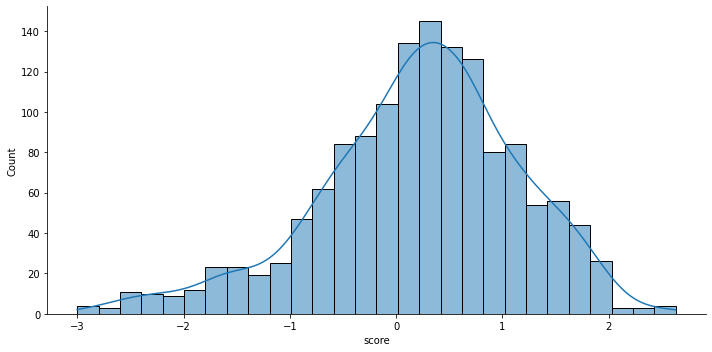

In [159]:
hist = sns.displot(
    data=arithmetic_df,
    x="score",
    aspect=2,
    kde=True,
)

### Family Background Variables

*   SM	-	Years of schooling of biological mother
*   SF	-	Years of schooling of biological father
*   SMR	-	Years of schooling of residential mother
*   SFR	-	Years of schooling of residential father
*   SIBLINGS	-	Number of siblings
*   AGEMBTH	-	Age of mother at respondent’s birth

### Household Income

*   HHINC97	-	Gross household income, $, in year prior to 1997 interview
*   POVRAT97	-	Ratio of household income to poverty level, 1997

In [160]:
hhinc_df = pd.DataFrame()
hhinc_df['income'] = df_data['HHINC97'].value_counts().index
hhinc_df['count'] = df_data['HHINC97'].value_counts().values
hhinc_df

,income,count
0,"246,474.00",33
1,"35,000.00",13
2,"75,000.00",11
3,"45,000.00",9
4,"40,000.00",9
...,...,...
751,"47,015.00",1
752,"31,045.00",1
753,"45,018.00",1
754,"65,328.00",1


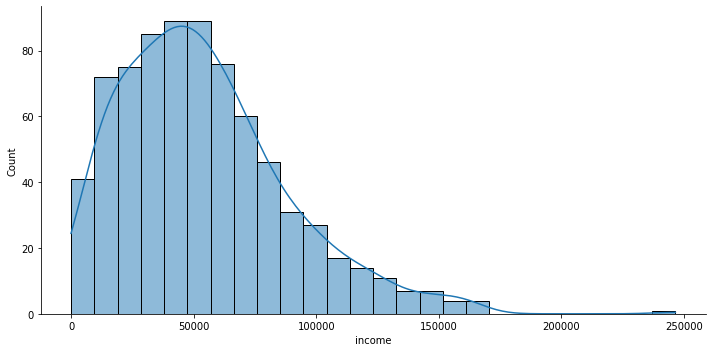

In [161]:
hist = sns.displot(
    data=hhinc_df,
    x="income",
    aspect=2,
    kde=True,
)

In [162]:
povrat_df = pd.DataFrame()
povrat_df['income_poverty_ratio'] = df_data['POVRAT97'].value_counts().index
povrat_df['count'] = df_data['POVRAT97'].value_counts().values
povrat_df

,income_poverty_ratio,count
0,"1,627.00",37
1,283.00,10
2,251.00,10
3,294.00,8
4,203.00,8
...,...,...
522,404.00,1
523,245.00,1
524,132.00,1
525,33.00,1


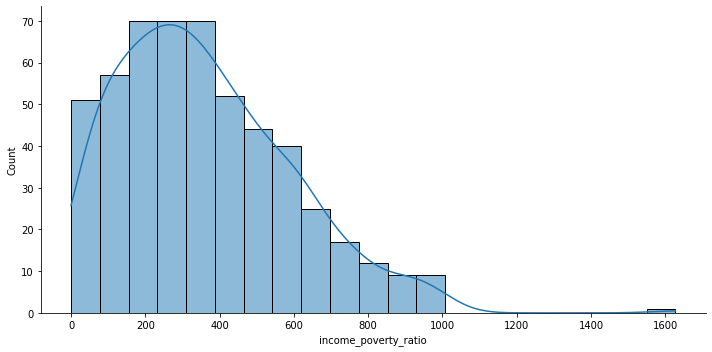

In [163]:
hist = sns.displot(
    data=povrat_df,
    x="income_poverty_ratio",
    aspect=2,
    kde=True,
)

### Parental monitoring 1997 (scale of 0, low, to 16, high)

*   PRMONM	-	Monitoring by mother
*   PRMONF	-	Monitoring by father

### Parental style 1997 (scale of 0, low, to 16, high)

*   PRMSTYUN	- Mother, uninvolved
*   PRMSTYPE	-	Mother, permissive
*   PRMSTYAU	-	Mother, authoritarian
*   PRMSTYAE	-	Mother, authoritative
*   PRFSTYUN	-	Father, uninvolved
*   PRFSTYPE	-	Father, permissive
*   PRFSTYAU	-	Father, authoritarian
*   PRFSTYAE	-	Father, authoritative

### Work-related variables

*   EARNINGS	- Current hourly earnings in $ reported at the 2011 interview
*   HOURS	-	Usual number of hours worked per week, 2011 interview
*   TENURE	-	Tenure (years) with current employer at the 2011 interview
*   EXP	-	Total out-of-school work experience (years) as of the 2011 interview
*   JOBS	-	Number of jobs, as of 2011 interview

In [164]:
df_data_descriptions.loc[88, 'Description']

'Total out-of-school work experience (years) as of the 2011 interview.'

We'll visualise the **categorical/qualitative** data using Seaborn's .displot() to create a bar chart and superimpose the Kernel Density Estimate (KDE) for the following **categorical/qualitative** variables:

*   Gender
*   Ethnicity
*   Education
*   Marital Status
*   Faith
*   Household Location, 1997
*   Household Structure, in terms of parents, 1997
*   Category of employment
*   Living in 2011 in
*   COLLBARG	-	Pay set by collective bargaining, 2011

#### Gender

---

---

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [213]:
target = df_data['EARNINGS'] # X
features = df_data.drop(['EARNINGS'], axis=1) # y

X_train, X_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size=0.2,
    random_state=10)

In [195]:
# % of training set
train_pct = 100*len(X_train)/len(features)
print(f'Training data is {train_pct:.3}% of the total data.')

# % of test data set
test_pct = 100*X_test.shape[0]/features.shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')

Training data is 80.0% of the total data.
Test data makes up the remaining 20.0%.


# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [196]:
regression = LinearRegression()

# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(df_data, columns=['S'])

# Response Variable or Target
y = pd.DataFrame(df_data, columns=['EARNINGS'])

# Find the best-fit line
regression.fit(X, y)

# Theta zero
print(regression.intercept_)

# Theta one
print(regression.coef_)

# R-squared
print(f"r-squared: {regression.score(X, y)}" +
      "\nThis accounts for ~ 8% of the variance in the Earnings.")

[1.03222727]
[[1.22105969]]
r-squared: 0.07923944586935583
This accounts for ~ 8% of the variance in the Earnings.


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [197]:
print("Earnings increase $1.22/hr for each additional year of schooling.")

Earnings increase $1.22/hr for each additional year of schooling.


### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

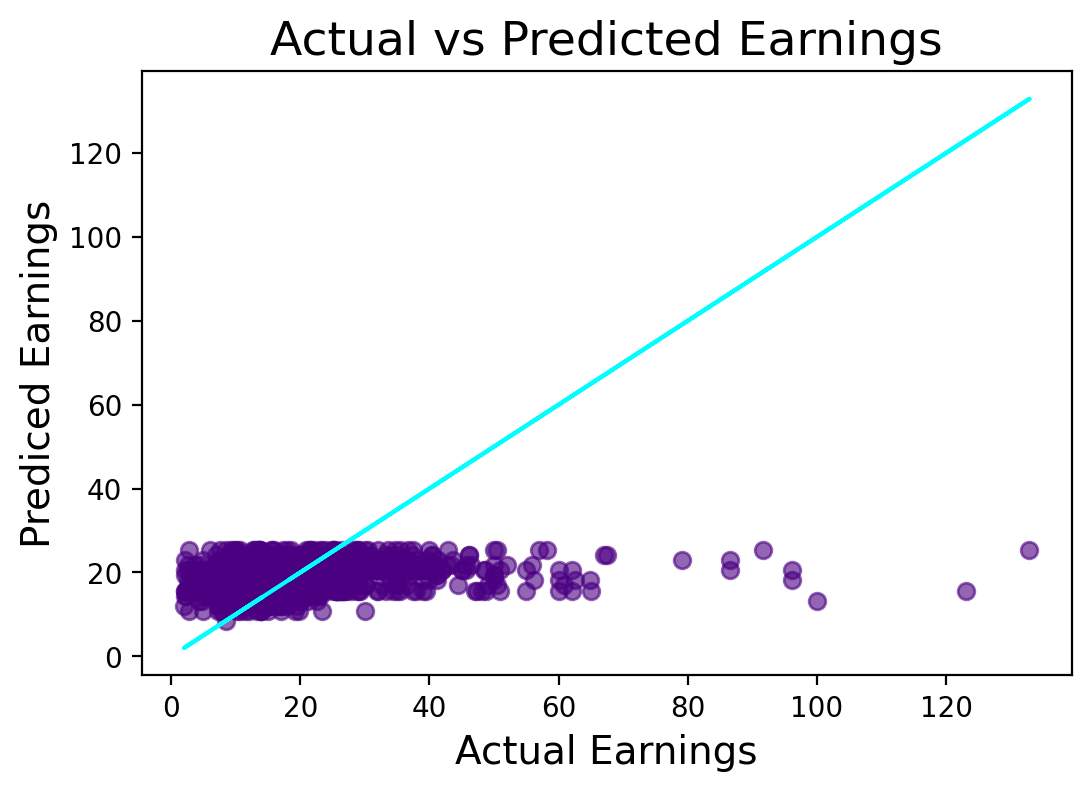

In [198]:
predicted_values = regression.predict(X)

plt.figure(dpi=200)
plt.scatter(x=y, y=predicted_values, c='indigo', alpha=0.6)
plt.plot(y, y, color='cyan')
plt.title(f'Actual vs Predicted Earnings', fontsize=17)
plt.xlabel('Actual Earnings', fontsize=14)
plt.ylabel('Prediced Earnings', fontsize=14)
plt.show()

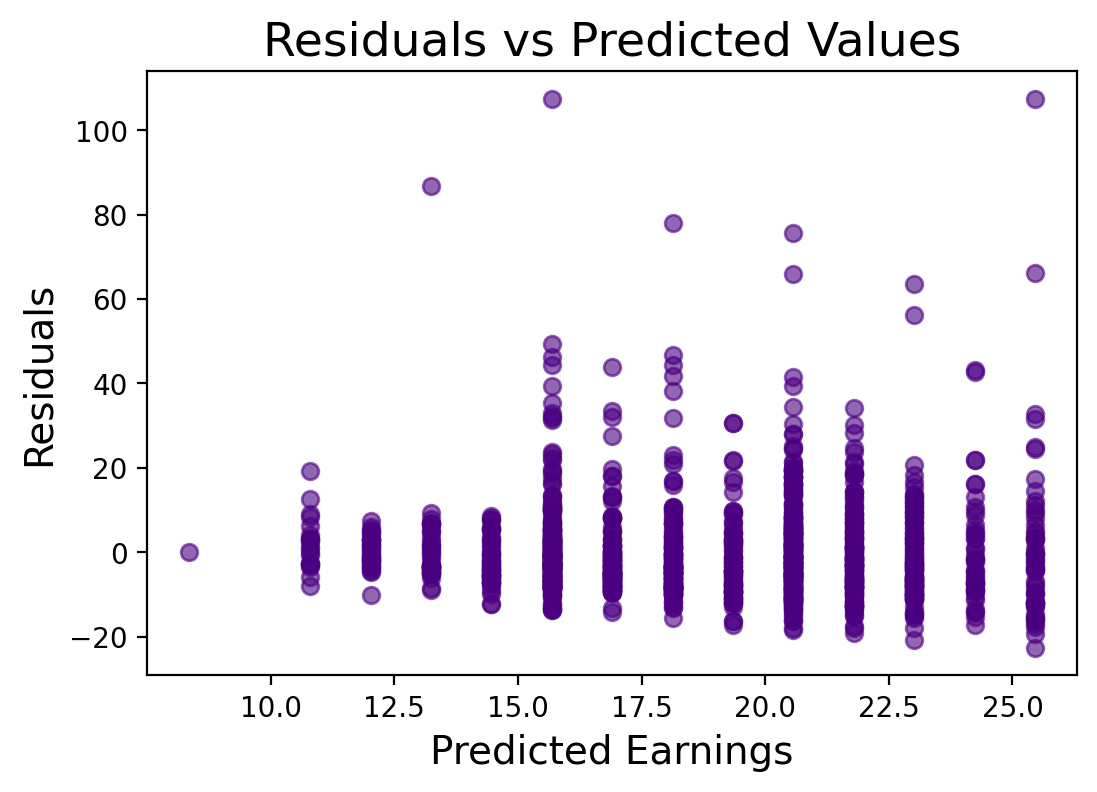

In [203]:
residuals = (y - predicted_values)
plt.figure(dpi=200)
plt.scatter(x=predicted_values, y=residuals, c='indigo', alpha=0.6)
plt.title(f'Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Earnings', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

[Text(0, 0.5, 'Predicted Earnings'),
 Text(0.5, 0, 'Actual Earnings'),
 Text(0.5, 1.0, 'Actual vs Predicted Earnings')]

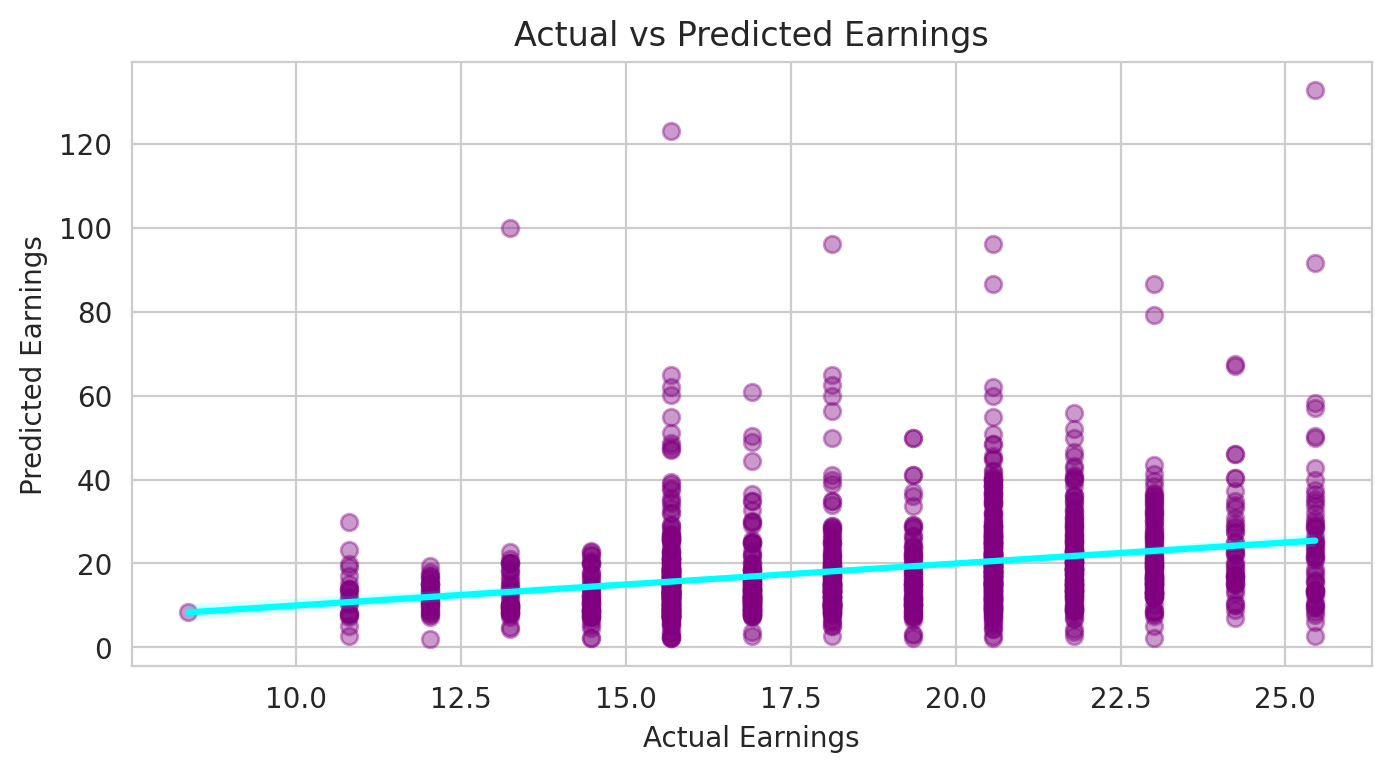

In [183]:
# # residual_df = X
# # residual_df['predicted_values'] = regression.predict(X)
# # residual_df['y'] = y

# predicted_values = regression.predict(X)
# residuals = (y - predicted_values)

# plt.figure(figsize=(8,4), dpi=200)
# with sns.axes_style("whitegrid"):
#   ax = sns.regplot(data=df_data,
#                    x=predicted_values,
#                    y=y,
#                    scatter_kws = {'alpha': 0.4},
#                    color='purple',
#                    line_kws = {'color': 'cyan'},
#                    )
# ax.set(#ylim=(0, 50),
#        #xlim=(0, 50),
#        ylabel='Predicted Earnings',
#        xlabel='Actual Earnings',
#        title="Actual vs Predicted Earnings",
#        )

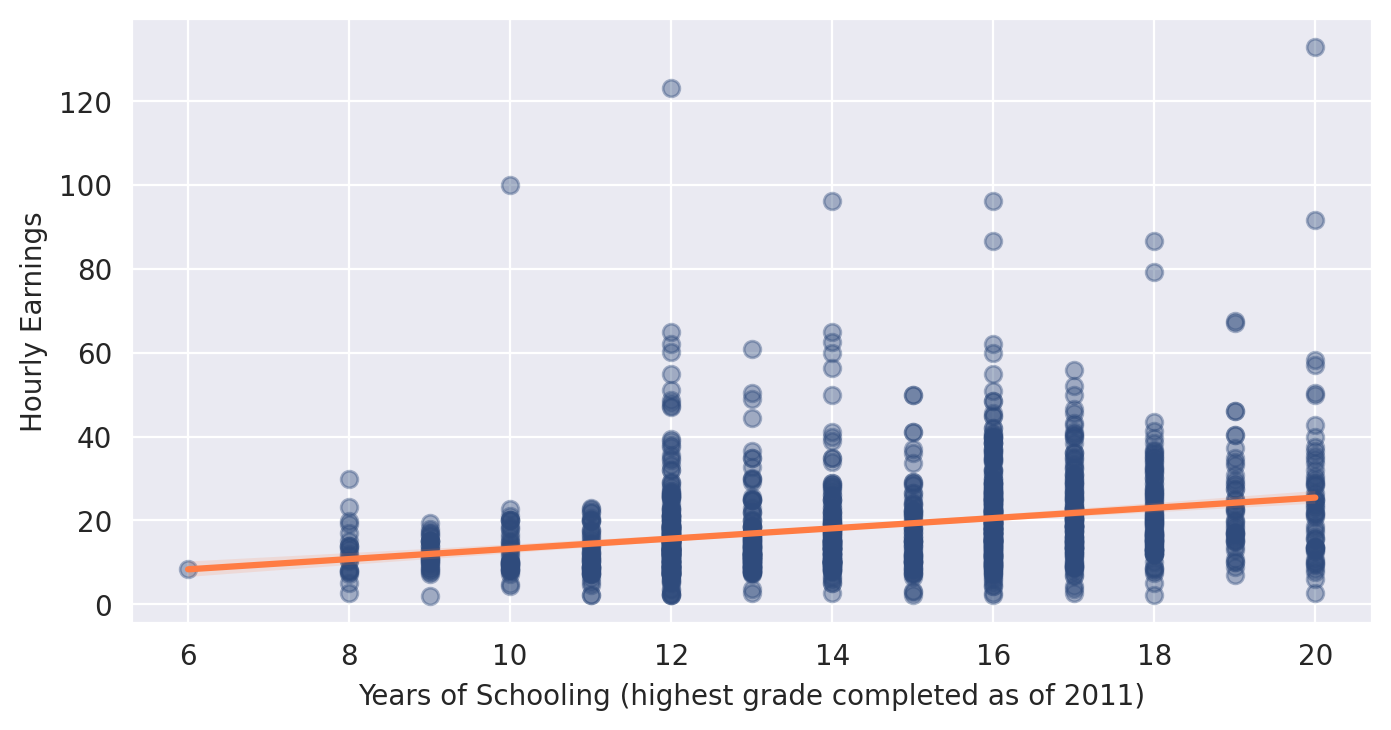

In [169]:
# plt.figure(figsize=(8,4), dpi=200)

# with sns.axes_style("darkgrid"):
#   ax = sns.regplot(data=df_data, 
#             x='S', # Years of schooling
#             y='EARNINGS',
#             color='#2f4b7c',
#             scatter_kws = {'alpha': 0.4},
#             line_kws = {'color': '#ff7c43'})
#   ax.set(#ylim=(0, 3000000000),
#        #xlim=(0, 450000000),
#        ylabel='Hourly Earnings',
#        xlabel='Years of Schooling (highest grade completed as of 2011)')

# plt.show()

There appear to be roughly equal residuals above and below the prediction line, with the exception of a few outliers above the line

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [200]:
regression = LinearRegression()

# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(df_data, columns=['S', 'EXP'])

# Response Variable or Target
y = pd.DataFrame(df_data, columns=['EARNINGS'])

# Find the best-fit line
regression.fit(X, y)

# Theta zero
print(regression.intercept_)

# Theta one
print(regression.coef_)

# R-squared
print(f"r-squared: {regression.score(X, y)}" +
      "\nThis accounts for ~ 11% of the variance in the Earnings.")

[-13.19734617]
[[1.77384834 0.92277133]]
r-squared: 0.11125180777359223
This accounts for ~ 11% of the variance in the Earnings.


### Evaluate the Coefficients of the Model

The coeffient for years of schooling has increased from 1.22 to 1.77.

The coeffient for years of work experience seems counterintuitive, as it is less than one: 0.92. I suppose at a certain point, if you begin working instead of continuing to get more education you would have more years experience but a smaller earnings due to less education.

### Analyse the Estimated Values & Regression Residuals

In [206]:
print(f"The residuals mean: {residuals.mean()}")
print(f"The residuals skew: {residuals.skew()}")

The residuals mean: EARNINGS   0.00
dtype: float64
The residuals skew: EARNINGS   3.07
dtype: float64


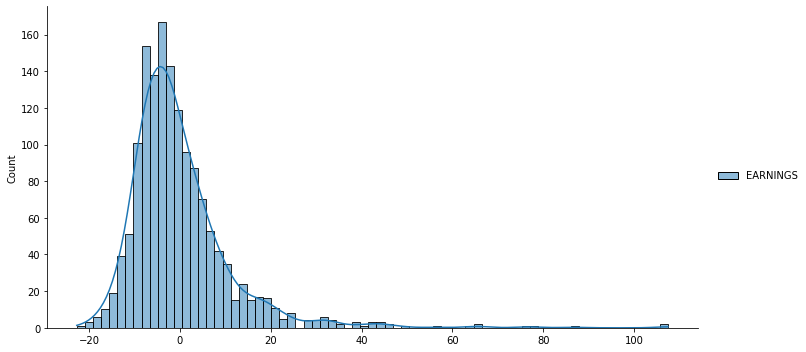

In [207]:
sns.displot(
    data=residuals,
    aspect=2,
    kde=True,
)

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [212]:
prediction = 16 * 1.77384834 + 0.92277133 * 5 - 13.19734617
print(f"Someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience in 2011 would expect to earn: ${round(prediction,2)}/hr")

Someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience in 2011 would expect to earn: $19.8/hr


# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 

In [214]:
df_data.iloc[97]

ID         3,266.00
EARNINGS      29.09
S             15.00
EXP            7.77
FEMALE         0.00
             ...   
MSA11NO        0.00
MSA11NCC       1.00
MSA11CC        0.00
MSA11NK        0.00
MSA11NIC       0.00
Name: 97, Length: 96, dtype: float64

In [ ]:
target = df_data['EARNINGS'] # X
features = df_data.drop(['EARNINGS'], axis=1) # y

X_train, X_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size=0.2,
    random_state=10)

In [ ]:
regression = LinearRegression()

# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(df_data, columns=['S', 'EXP'])

# Response Variable or Target
y = pd.DataFrame(df_data, columns=['EARNINGS'])

# Find the best-fit line
regression.fit(X, y)

# Theta zero
print(regression.intercept_)

# Theta one
print(regression.coef_)

# R-squared
print(f"r-squared: {regression.score(X, y)}" +
      "\nThis accounts for ~ 11% of the variance in the Earnings.")